In [1]:
import pandas as pd
import time
import numpy as np
#from sklearn.cross_validation import train_test_split
import xgboost as xgb
import copy
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn import metrics
import lightgbm as lgb



### data load 

In [2]:
path = './data/'

application_train = pd.read_csv(path + "application_train.csv" )#,nrows=10000) #, skiprows=1, nrows=40000
application_test = pd.read_csv(path + "application_test.csv" )#,nrows=10000) #, skiprows=1, nrows=40000

application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#application_train = application_train.select_dtypes(include=["int","bool","float"])

typesDf = application_train.dtypes

NamesAll =list(application_train)
indixObject = typesDf.values == "O"
objectNames = np.array(NamesAll)[np.array(indixObject)]
for name in objectNames:
    application_train[name] = application_train[name].astype('category')

#application_test = application_test.select_dtypes(include=["int","bool","float"])


In [4]:

#print(np.divide( np.sum(application_train.TARGET), application_train.shape[0])*100)
#application_train.hist("TARGET")

In [5]:
#application_train = application_train[application_train['SK_ID_CURR'].apply(lambda x: type(x) in [int, np.int64, float, np.float64])]

#application_train = application_train.select_dtypes(include=["int","bool","float"])
#application_test = application_test.select_dtypes(include=["int","bool","float"])

#application_test.shape

In [6]:


y = application_train["TARGET"]
X = application_train.drop(["TARGET","SK_ID_CURR"], axis=1)

amountTrue = sum(y)/len(y)
amountFalse = 1 - amountTrue

def weightFun(x):
    if x==0:
        return 1/amountFalse
    else:
        return 1/amountTrue

weights=list(map(weightFun,y))

weights = np.array(weights)


#application_train2=application_train.sub(means)
def zNormPandas(X):
    means = X.mean()
    standarDev = X.std()
    X=X.sub(means)
    return X.div(standarDev)


#X = zNormPandas(X)

if False:
    train_X = X
    train_y = y
    test_X = X
    test_y = y
    dtrain = xgb.DMatrix(train_X,label=train_y)
    dtest = xgb.DMatrix(test_X)  
else:
    train_index = np.random.choice(len(X), round(len(X) * 0.7), replace=False)
    test_index = np.array(list(set(range(len(X))) - set(train_index)))

    train_X = X.iloc[train_index]
    weights_X = weights[train_index]
    train_y = y.iloc[train_index]
    test_X = X.iloc[test_index]
    test_y = y.iloc[test_index]

    #dtrain = xgb.DMatrix(train_X,label=train_y,weight=weights_X)
    #dtest = xgb.DMatrix(test_X)    
    


In [21]:
lgb_train = lgb.Dataset(train_X,train_y)
lgb_eval = lgb.Dataset(test_X, test_y, reference=lgb_train)



In [8]:
print(np.divide( np.sum(train_y), train_y.shape[0])*100)
print(np.divide( np.sum(test_y), test_y.shape[0])*100)


8.02200150517054
8.191603525088615


Start training...
[1]	valid_0's auc: 0.704475	valid_0's l2: 0.0727885
Training until validation scores don't improve for 1 rounds.
[2]	valid_0's auc: 0.716291	valid_0's l2: 0.0717436
[3]	valid_0's auc: 0.722574	valid_0's l2: 0.0712018


/home/pedro/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:102: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[4]	valid_0's auc: 0.729127	valid_0's l2: 0.070697
[5]	valid_0's auc: 0.731794	valid_0's l2: 0.0704299
[6]	valid_0's auc: 0.736379	valid_0's l2: 0.0701028
[7]	valid_0's auc: 0.738966	valid_0's l2: 0.0699207
[8]	valid_0's auc: 0.740297	valid_0's l2: 0.0698125
[9]	valid_0's auc: 0.74247	valid_0's l2: 0.0696897
[10]	valid_0's auc: 0.743697	valid_0's l2: 0.0696149
[11]	valid_0's auc: 0.745152	valid_0's l2: 0.0695459
[12]	valid_0's auc: 0.74578	valid_0's l2: 0.0695246
[13]	valid_0's auc: 0.748548	valid_0's l2: 0.0693986
[14]	valid_0's auc: 0.749046	valid_0's l2: 0.069376
[15]	valid_0's auc: 0.749158	valid_0's l2: 0.0693649
[16]	valid_0's auc: 0.749822	valid_0's l2: 0.0693312
[17]	valid_0's auc: 0.750159	valid_0's l2: 0.0693183
[18]	valid_0's auc: 0.750378	valid_0's l2: 0.069315
[19]	valid_0's auc: 0.750937	valid_0's l2: 0.069275
[20]	valid_0's auc: 0.750939	valid_0's l2: 0.0692854
Early stopping, best iteration is:
[19]	valid_0's auc: 0.750937	valid_0's l2: 0.069275
end training...


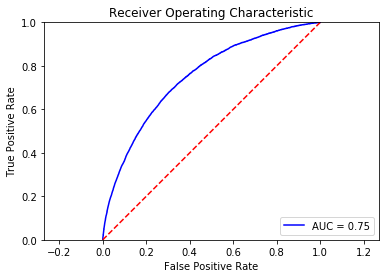

In [39]:
params = {
    'max_depth': -1,
    'n_estimators': 200,
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'l2', 'auc'},
    'num_leaves': 20,
    'learning_rate': 0.3,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}


param_dist = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }

cate_features_name = objectNames.tolist()

print('Start training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=70,
                categorical_feature = cate_features_name, 
                valid_sets=lgb_eval,
                early_stopping_rounds=1)
print('end training...')
# valid_sets=lgb_eval
#pred = np.round(pred)

pred = gbm.predict(test_X, num_iteration=gbm.best_iteration)

ypred = np.round(pred)

#auc2(model2, train, test)

#print( sum(test_y==pred)/len(pred)*100 )

#skplt.metrics.plot_confusion_matrix(test_y, ypred, normalize=True)
#plt.show()
buildROC(test_y,pred)

In [10]:
ypred

array([0., 0., 0., ..., 0., 0., 0.])

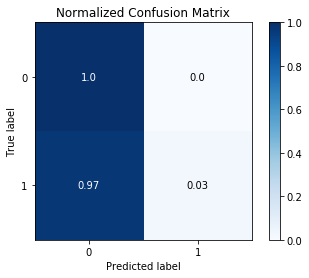

In [11]:

ypred = np.round(pred)
skplt.metrics.plot_confusion_matrix(test_y, ypred , normalize=True)
plt.show()


In [12]:
ypred.shape


(92253,)

In [13]:

ypred = np.float32(np.ones((len(pred),1))[pred > 0.5])


In [14]:
def buildROC(target_test,test_preds):
    fpr, tpr, threshold = metrics.roc_curve(target_test, test_preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.axis('equal')
    plt.axis([0, 1, 0, 1])
    #plt.gcf().savefig('roc.png')

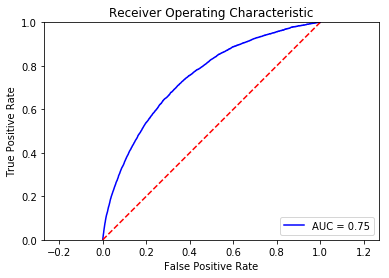

In [15]:
buildROC(test_y,pred)

In [16]:
len(test_y)

92253

In [17]:
submitTest = xgb.DMatrix(application_test.drop(["SK_ID_CURR"], axis=1))
submit = bst.predict(submitTest, ntree_limit=bst.best_ntree_limit)


ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in fields NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, OCCUPATION_TYPE, WEEKDAY_APPR_PROCESS_START, ORGANIZATION_TYPE, FONDKAPREMONT_MODE, HOUSETYPE_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE

In [ ]:
print(submit.shape)
print(application_test.SK_ID_CURR.shape)
skId=application_test.SK_ID_CURR.values
print(skId)

In [ ]:
#dataToSubmit=np.array([ np.array([submit,submit]), skId ])
#SK_ID_CURR,TARGET

data ={'SK_ID_CURR': skId, 
        'TARGET': submit}

df = pd.DataFrame( data)


In [ ]:
#df = pd.DataFrame( np.array([submit,submit]),index=skId)
#sub.to_csv('xgb_sub.csv',index=False)
df.to_csv('xgb_sub_3.csv',index=False)

In [ ]:
plt.plot(submit)

In [ ]:
means = application_train.mean()
standarDev = application_train.std()
standarDev

In [ ]:
application_train.describe()

In [ ]:

U=zNormPandas(application_train)
U.describe()